In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lzma
import pickle

from matplotlib.lines import Line2D

In [2]:
load_Dir = "../Data/"

In [3]:
#file_name = "DF_20250217-c0_a2.xz"
file_name = "DF_20250515-133150_927.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame_tot = pickle.load(f)

In [4]:
data_frame_tot = data_frame_tot[(data_frame_tot['init']=="rnd") & ( (data_frame_tot[r"$N$"]==10000) | (data_frame_tot[r"$N$"]==40000) | (data_frame_tot[r"$N$"]==160000) )]
data_frame_tot[r"$\rho$"] = data_frame_tot["M"]

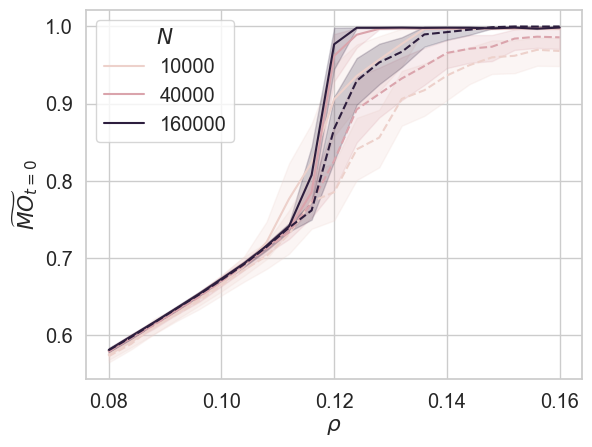

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set_theme(style="whitegrid",font_scale=1.3)
y_s = "$\widetilde{MO}_{t=0}$"
sns.lineplot(data=data_frame_tot,x=r"$\rho$",y=y_s, hue=r"$N$")
y_s = "$\widetilde{O}_{t=0}$"
sns.lineplot(data=data_frame_tot,x=r"$\rho$",y=y_s, hue=r"$N$", linestyle="--",legend=False)
plt.show()
#plt.savefig("MO_N_rho.pdf")

In [6]:
# create a new dataframe as an extended copy data_frame_tot with a new column "Overlap", of double the length. the first half should be a copy of data_frame_tot and have r"$\widetilde{MO}_{t=0}$" stored in the new column, while the second half should be a copy of data_frame_tot and have r"$\widetilde{O}_{t=0}$" stored in the new column
data_frame_A = data_frame_tot.copy()    
data_frame_B = data_frame_tot.copy()
data_frame_A["O"] = data_frame_A[r"$\widetilde{MO}_{t=0}$"]
data_frame_B["O"] = data_frame_B[r"$\widetilde{O}_{t=0}$"]
data_frame_A["Overlap"] = r"$\widetilde{MO}_{t=0}$"
data_frame_B["Overlap"] = r"$\widetilde{O}_{t=0}$"
data_frame_tot_2 = pd.concat([data_frame_A, data_frame_B], ignore_index=True)


In [9]:
sns.set_theme(style="whitegrid",font_scale=1.3)
data_frame_tot["Nishi"] = -data_frame_tot["$\delta O_{t=0}$"] #$\widetilde{\delta O}_{t=0}$
y_s = "$\delta {\rm O}_{t=0}$"

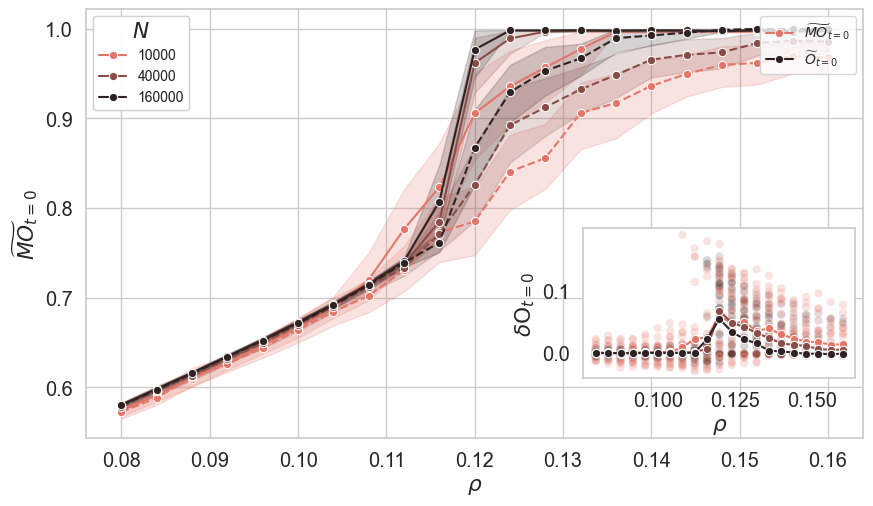

In [10]:
# put the last plot as a inset of the previous one
palette = [sns.color_palette("dark:salmon_r",10)[1],sns.color_palette("dark:salmon_r",10)[5],sns.color_palette("dark:salmon_r",10)[9]]
fig, ax = plt.subplots(figsize=(9, 6))
y_s = "$\widetilde{MO}_{t=0}$"
sns.lineplot(data=data_frame_tot,x=r"$\rho$",y=y_s, hue=r"$N$",ax=ax,palette=palette,linestyle="solid",errorbar="ci",marker="o")
y_s = "$\widetilde{O}_{t=0}$"
sns.lineplot(data=data_frame_tot,x=r"$\rho$",y=y_s, hue=r"$N$", linestyle="--",legend=False,ax=ax,palette=palette,marker="o",errorbar="ci")
#axins in bottom right corner
axins = ax.inset_axes([0.64, 0.14, 0.35, 0.35])  # [x, y, width, height]
sns.lineplot(data=data_frame_tot,x=r"$\rho$",y="Nishi",hue=r"$N$",errorbar=None,ax=axins,legend=False,palette=palette,marker="o")
sns.scatterplot(data=data_frame_tot,x=r"$\rho$",y="Nishi",hue=r"$N$",ax=axins,legend=False,palette=palette,marker="o",alpha=0.2)
#axins.set_xlabel(r"$\rho$")
axins.set_ylabel(r"$\delta {\rm O}_{t=0}$")
axins.grid(False)
ax.set_xlabel(r"$\rho$")
ax.set_ylabel(r"$\widetilde{MO}_{t=0}$")
ax.legend(title=r"$N$", loc='upper left')

#add second legend to distinguish O vs MO 
handles, labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[2]]
labels = [r"$\widetilde{MO}_{t=0}$", r"$\widetilde{O}_{t=0}$"]
legend2 = ax.legend(handles, labels, loc='upper right', fontsize=10)
ax.add_artist(ax.legend(title=r"$N$", loc='upper left', fontsize=10))

ax.add_artist(legend2)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

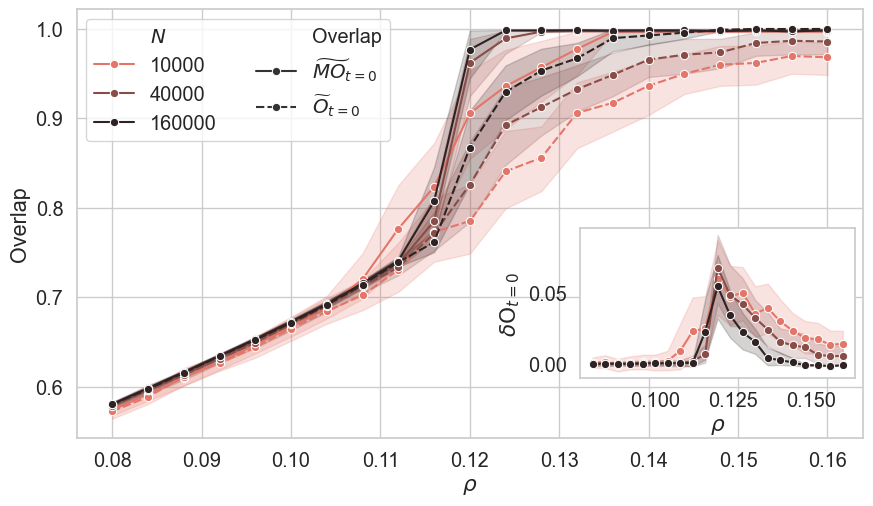

In [12]:
# put the last plot as a inset of the previous one
palette = [sns.color_palette("dark:salmon_r",10)[1],sns.color_palette("dark:salmon_r",10)[5],sns.color_palette("dark:salmon_r",10)[9]]
fig, ax = plt.subplots(figsize=(9, 6))
y_s = "O"
sns.lineplot(data=data_frame_tot_2,x=r"$\rho$",y=y_s, hue=r"$N$",ax=ax,palette=palette,linestyle="solid",errorbar="ci",marker="o", style= "Overlap")
#axins in bottom right corner
axins = ax.inset_axes([0.64, 0.14, 0.35, 0.35])  # [x, y, width, height]
sns.lineplot(data=data_frame_tot,x=r"$\rho$",y="Nishi",hue=r"$N$",errorbar="ci",ax=axins,legend=False,palette=palette,marker="o")
#axins.set_xlabel(r"$\rho$")
axins.set_ylabel(r"$\delta {\rm O}_{t=0}$")
axins.grid(False)
ax.set_xlabel(r"$\rho$")
ax.set_ylabel(r"Overlap")

# Adjust legend
ax.legend(loc='upper left', ncol=2)

plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.savefig("../Plots/Figure12.pdf")